In [1]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import pandas
data= pd.read_csv("reviews.csv")
data.head()

,id,profileName,text,date,title,rating,images,helpful,Style name,Colour
0,R3A7LKHO3QIEI6,Vijay Gandhi,\n Battery Issue.... Phone is Heating during ...,Reviewed in India on 19 April 2021,OnePlus 9R - Not As per Expectations,1,NaN,2,"12GB RAM, 256GB Storage",Lake Blue
1,RTC2JFCZRT3ML,NeHaaL,\n Facing heating issue while using camera ap...,Reviewed in India on 19 April 2021,Heating issue,1,NaN,1,"8GB RAM, 128GB Storage",Lake Blue
2,RKFNBV8UHH917,Mohit MJ,\n My first time buying a OnePlus phone and I...,Reviewed in India on 19 April 2021,Amazing - True Flagship,5,NaN,916,"8GB RAM, 128GB Storage",Lake Blue
3,R2575KONXPQXVE,ASHANNITA,\n HiPlease consider this message with a seri...,Reviewed in India on 30 May 2021,Claim for Replacement of Oneplus 9R phone...,1,NaN,817,"8GB RAM, 128GB Storage",Lake Blue
4,RWXB385NSDLJL,AshokA,\n Within 10 minutes of usage. It’s felt like...,Reviewed in India on 19 April 2021,Over heat mobile,1,https://images-na.ssl-images-amazon.com/images...,462,"8GB RAM, 128GB Storage",Lake Blue


In [3]:
data1= data.drop(data.columns[[0, 1, 3, 4,5,6,7,8,9]], axis=1)
data1

,text
0,\n Battery Issue.... Phone is Heating during ...
1,\n Facing heating issue while using camera ap...
2,\n My first time buying a OnePlus phone and I...
3,\n HiPlease consider this message with a seri...
4,\n Within 10 minutes of usage. It’s felt like...
...,...
95,\n The best experience you can get at this pr...
96,\n Heating issue is there definately and noti...
97,\n Posting this Review after using 9R for one...
98,\n My first OnePlus phone . After using 15 da...


In [4]:
data1 = [x.strip()for x in data1.text]
data1 =[x for x in data1 if x]
data1[0:10]

['Battery Issue.... Phone is Heating during Charging and During Running Application.',
 'Facing heating issue while using camera app and general usage in 60hz refresh rate if I use 120hz it gradually heating issue increase please solve this problem',
 'My first time buying a OnePlus phone and I really like the finish of the one. Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything. The downside for me is that there is no place expand the memory.---Updating my review after 100 days of using. Bought on April 19th updated review on July 29th.Super fast charging.. 30 mins and goes from say 30% battery to 100% battery charge.I also bought the OnePlus Buds Z along with the phone and these are great quality. Connecting the buds sometimes is an issue. Sometimes it will connect automatically and sometimes it will not detect.Overall I still love this phone though I think its a bit heavy and large screen for non-ga

In [5]:
# joining te list
text = ' '.join(data1)
text

'Battery Issue.... Phone is Heating during Charging and During Running Application. Facing heating issue while using camera app and general usage in 60hz refresh rate if I use 120hz it gradually heating issue increase please solve this problem My first time buying a OnePlus phone and I really like the finish of the one. Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything. The downside for me is that there is no place expand the memory.---Updating my review after 100 days of using. Bought on April 19th updated review on July 29th.Super fast charging.. 30 mins and goes from say 30% battery to 100% battery charge.I also bought the OnePlus Buds Z along with the phone and these are great quality. Connecting the buds sometimes is an issue. Sometimes it will connect automatically and sometimes it will not detect.Overall I still love this phone though I think its a bit heavy and large screen for non-gamers. HiP

In [6]:
#punctuation
no_punc_text = text.translate(str.maketrans('','', string.punctuation))
no_punc_text

'Battery Issue Phone is Heating during Charging and During Running Application Facing heating issue while using camera app and general usage in 60hz refresh rate if I use 120hz it gradually heating issue increase please solve this problem My first time buying a OnePlus phone and I really like the finish of the one Camera is excellent Android 11 is very smooth to use functions are fastJust my first day of usage so hard to be critical of anything The downside for me is that there is no place expand the memoryUpdating my review after 100 days of using Bought on April 19th updated review on July 29thSuper fast charging 30 mins and goes from say 30 battery to 100 battery chargeI also bought the OnePlus Buds Z along with the phone and these are great quality Connecting the buds sometimes is an issue Sometimes it will connect automatically and sometimes it will not detectOverall I still love this phone though I think its a bit heavy and large screen for nongamers HiPlease consider this messag

In [7]:
#Tokenization
import nltk
nltk.download()
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Battery', 'Issue', 'Phone', 'is', 'Heating', 'during', 'Charging', 'and', 'During', 'Running', 'Application', 'Facing', 'heating', 'issue', 'while', 'using', 'camera', 'app', 'and', 'general', 'usage', 'in', '60hz', 'refresh', 'rate', 'if', 'I', 'use', '120hz', 'it', 'gradually', 'heating', 'issue', 'increase', 'please', 'solve', 'this', 'problem', 'My', 'first', 'time', 'buying', 'a', 'OnePlus', 'phone', 'and', 'I', 'really', 'like', 'the']


In [8]:
len(text_tokens)

11515

In [10]:
# remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words =  stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Battery', 'Issue', 'Phone', 'Heating', 'Charging', 'During', 'Running', 'Application', 'Facing', 'heating', 'issue', 'using', 'camera', 'app', 'general', 'usage', '60hz', 'refresh', 'rate', 'I', 'use', '120hz', 'gradually', 'heating', 'issue', 'increase', 'please', 'solve', 'problem', 'My', 'first', 'time', 'buying', 'OnePlus', 'phone', 'I', 'really', 'like', 'finish', 'one']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#normalize the data
lower_words =[x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['battery', 'issue', 'phone', 'heating', 'charging', 'during', 'running', 'application', 'facing', 'heating', 'issue', 'using', 'camera', 'app', 'general', 'usage', '60hz', 'refresh', 'rate', 'i', 'use', '120hz', 'gradually', 'heating', 'issue']


In [13]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['batteri', 'issu', 'phone', 'heat', 'charg', 'dure', 'run', 'applic', 'face', 'heat', 'issu', 'use', 'camera', 'app', 'gener', 'usag', '60hz', 'refresh', 'rate', 'i', 'use', '120hz', 'gradual', 'heat', 'issu', 'increas', 'pleas', 'solv', 'problem', 'my', 'first', 'time', 'buy', 'oneplu', 'phone', 'i', 'realli', 'like', 'finish', 'one']


In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [15]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Battery Issue Phone Heating Charging During Running Application Facing heating issue using camera app general usage 60hz refresh rate I use 120hz gradually heating issue increase please solve problem My first time buying OnePlus phone I really like finish one


In [16]:
lemmas = [token.lemma_ for token in doc ]
print(lemmas[0:25])

['Battery', 'Issue', 'Phone', 'Heating', 'Charging', 'during', 'Running', 'application', 'face', 'heating', 'issue', 'use', 'camera', 'app', 'general', 'usage', '60hz', 'refresh', 'rate', 'I', 'use', '120hz', 'gradually', 'heating', 'issue']


In [18]:
#feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [20]:
print(vectorizer.vocabulary)

None


In [23]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['3035k', '30fps', '30minwhich', '30th', '32', '34', '35', '3540', '35mins', '38', '38mins', '39999', '39k', '3k', '3spaker', '3then', '40', '40000', '4045', '40k', '40ki', '44', '45', '4550', '45min', '48', '49', '4a', '4alterslider', '4k', '50', '50k', '50min', '5camera', '5gonly', '5gso', '5gwant', '5tslight', '60', '6070', '60fps', '60hz', '65', '655', '65w', '65wat', '67', '6and', '6s', '7nable']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print(X.toarray().shape)

(7507, 1929)


In [27]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(data1)

In [28]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['5g', '9r', 'after', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'back', 'battery', 'be', 'best', 'better', 'but', 'buy', 'by', 'camera', 'camera is', 'can', 'charge', 'charging', 'day', 'days', 'device', 'display', 'don', 'even', 'experience', 'fast', 'for', 'from', 'get', 'go', 'good', 'great', 'has', 'have', 'heating', 'if', 'if you', 'in', 'is', 'issue', 'issues', 'it', 'it is', 'just', 'like', 'mobile', 'more', 'my', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'one plus', 'oneplus', 'only', 'or', 'os', 'other', 'performance', 'phone', 'plus', 'price', 'quality', 'quality is', 'really', 'smooth', 'so', 'than', 'that', 'the', 'the phone', 'there', 'they', 'this', 'this phone', 'time', 'to', 'up', 'usage', 'use', 'using', 'very', 'was', 'well', 'when', 'which', 'while', 'will', 'with', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 2 1 0]
 ...
 [1 1 1 ... 4 1 6]
 [2 1 3 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
bow_matrix_ngram.toarray().shape

(100, 100)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data1)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '11', '12', '120hz', '120hz refresh', '120hz refresh rate', '15', '30', '40', '40k', '5g', '5g bands', '5t', '60', '65', '65w', '870', '8t', '9r', '9r is', 'about', 'after', 'after using', 'all', 'almost', 'also', 'also the', 'always', 'am', 'amazing', 'amazon', 'an', 'and', 'and it', 'and the', 'and this', 'android', 'any', 'apps', 'are', 'as', 'as well', 'at', 'at all', 'at this', 'available', 'average', 'awesome', 'back', 'backup', 'backup is', 'bad', 'band', 'bands', 'battery', 'battery backup', 'battery backup is', 'battery life', 'battery life is', 'be', 'because', 'been', 'been using', 'before', 'best', 'best in', 'better', 'better than', 'bit', 'both', 'bought', 'brand', 'budget', 'bugs', 'build', 'build quality', 'built', 'but', 'but it', 'but not', 'but the', 'buy', 'buying', 'by', 'call', 'camera', 'camera and', 'camera is', 'camera quality', 'can', 'can be', 'care', 'charge', 'charger', 'charges', 'charging', 'charging and', 'charging is', 'cheap', 'clean', 'c

In [36]:
tf_idf_matrix_n_gram_max_features.toarray().shape

(100, 500)

In [39]:
#Generate wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");
    

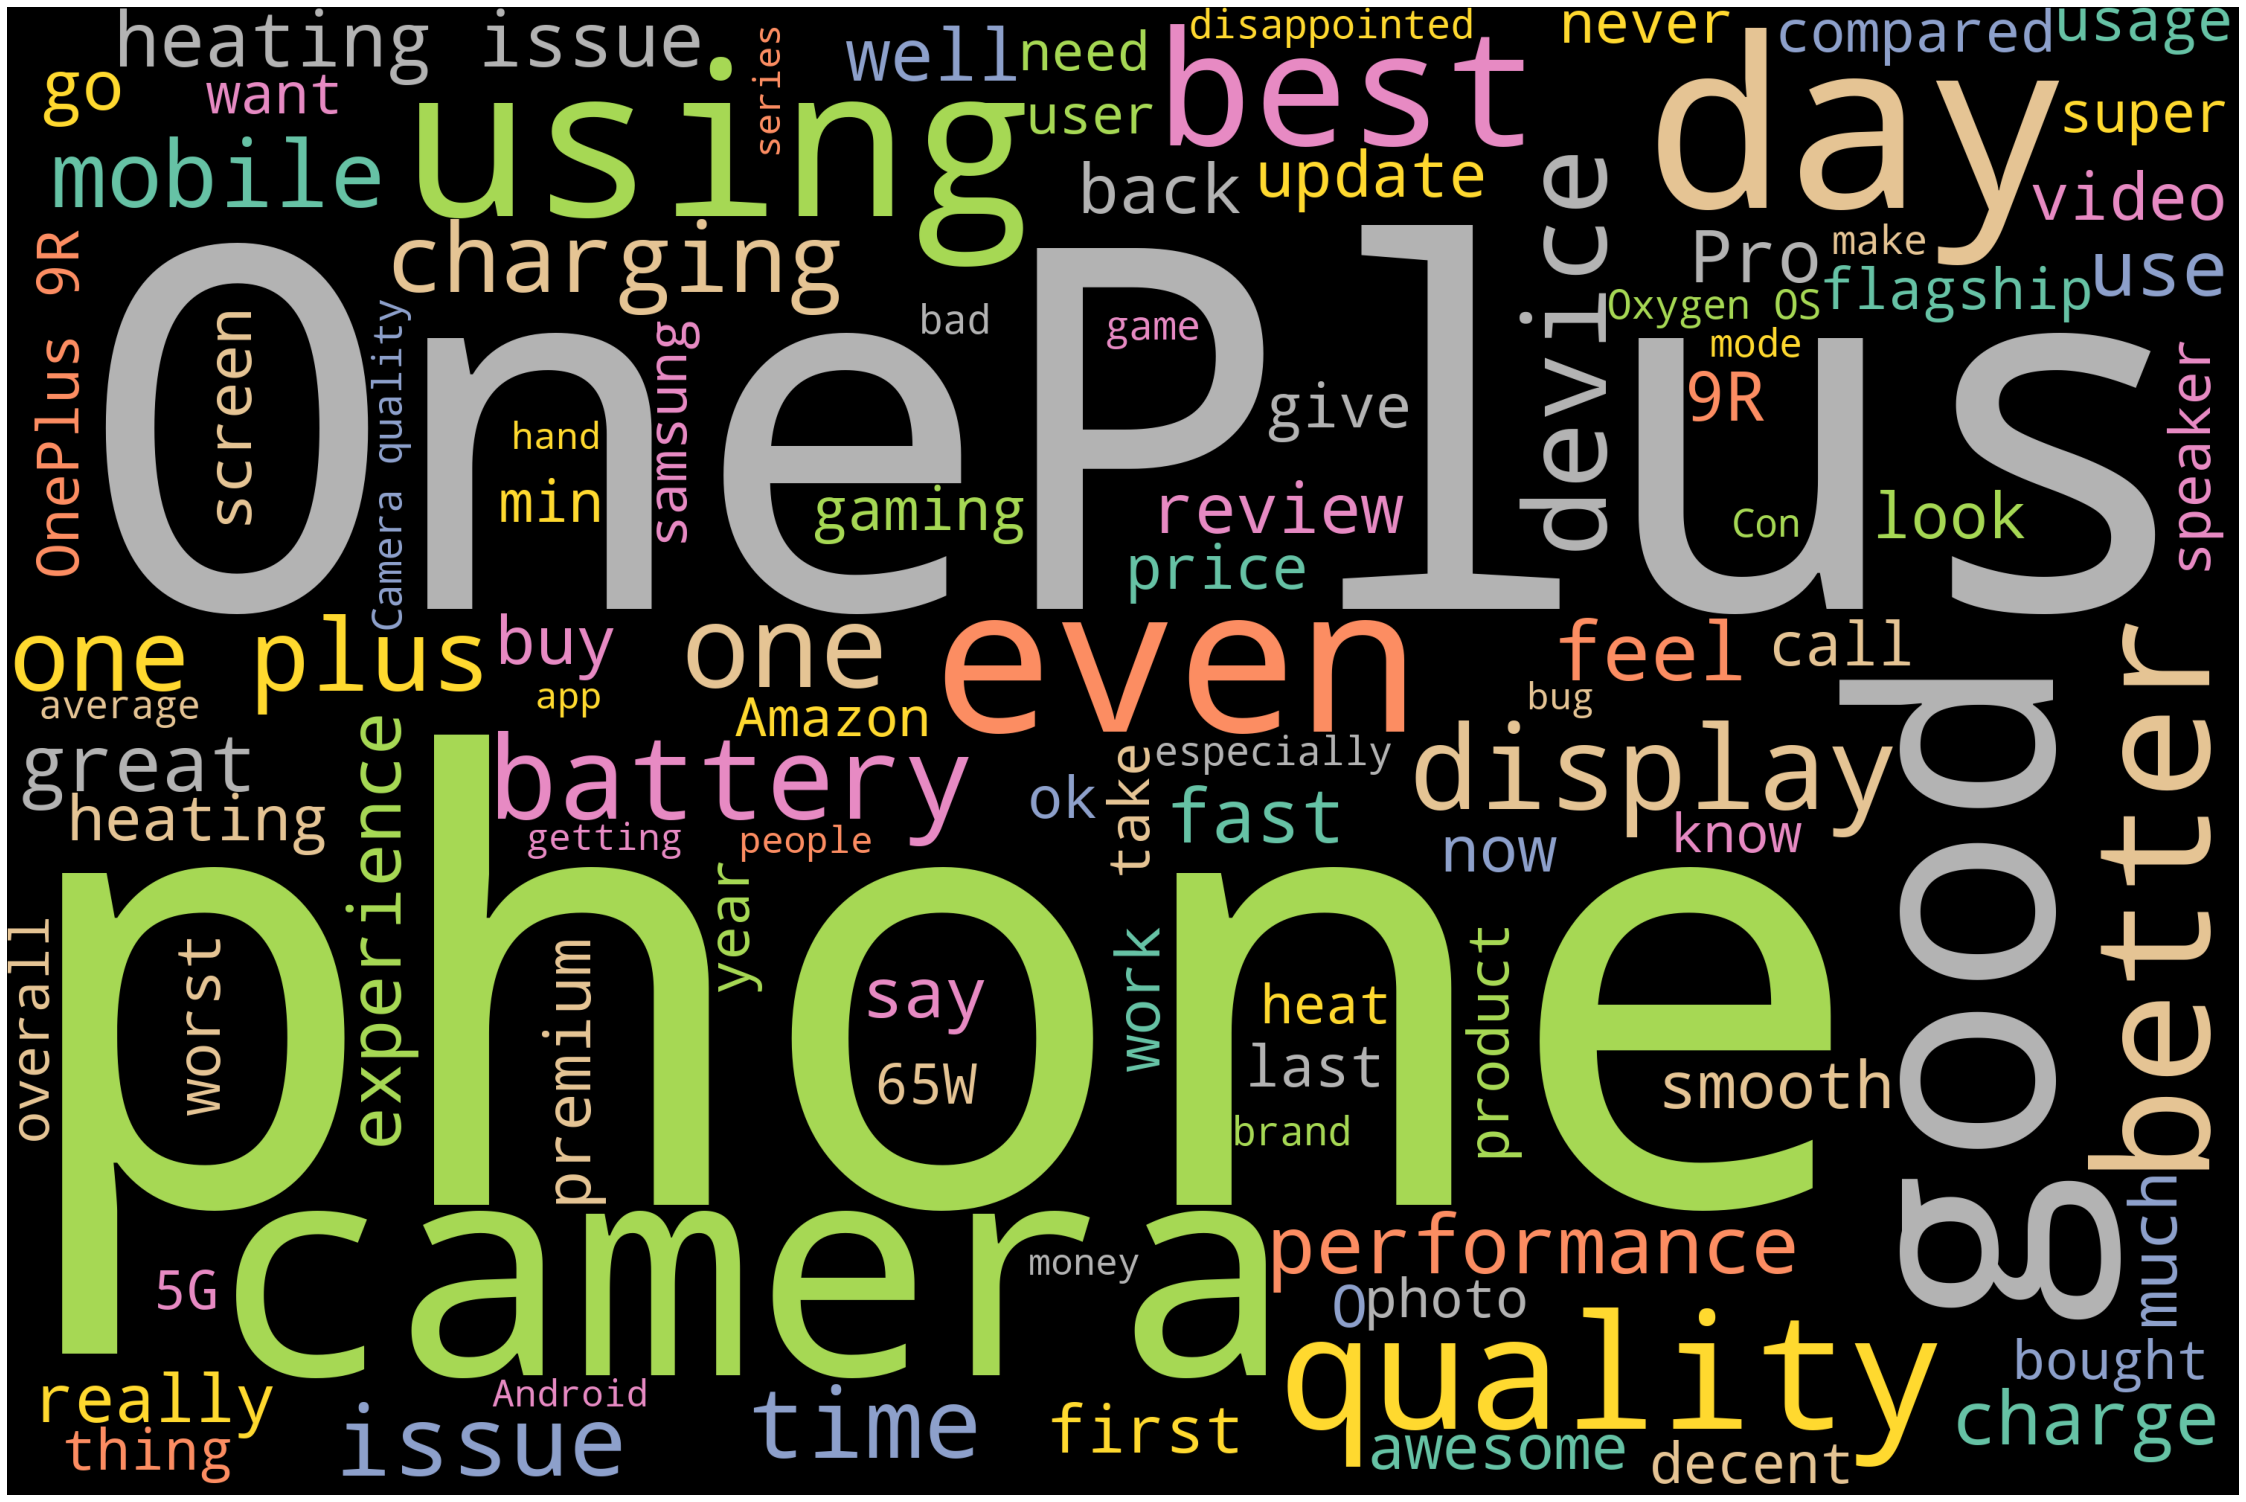

In [41]:
stopwords =  STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width= 3000, height = 2000, background_color='black', max_words=100,colormap='Set2', stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [42]:
wordcloud.to_file("result.png")